## Importing libraries and reading the data

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("dark")
sns.color_palette("dark")


[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [142]:
bikes = pd.read_csv("london_merged.csv")
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [143]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [144]:
bikes.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [145]:
bikes.shape

(17414, 10)

In [146]:
bikes.duplicated().value_counts()

False    17414
dtype: int64

We can see that there are no null values and no duplicates in all >17k rows. That's a good news. 

In [147]:
#changing column names
bikes.rename(columns = {"timestamp": "time",
    "cnt": 'number',
    "t1": "temperature",
    "t2": "temp_feeling",
    "hum": "humidity_%",
    "wind_speed": "wind_kph",
    "weather_code": "weather" }, inplace = True)
bikes.head()

,time,number,temperature,temp_feeling,humidity_%,wind_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [148]:
#Since timestamps are read as object, we probably need to change them into datetime format
bikes['time'] = pd.to_datetime(bikes['time'])

In [149]:
#Since there's no other sort of index I will be using timestamps for that purpose
bikes = bikes.set_index('time')
bikes.head()

,number,temperature,temp_feeling,humidity_%,wind_kph,weather,is_holiday,is_weekend,season
time,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [150]:
#The next thing is to split date/time data into several columns which will make it easier for future analysis
bikes['year_month'] = bikes.index.strftime('%Y-%m')
bikes['year'] = bikes.index.year
bikes['month'] = bikes.index.month
bikes['day_month'] = bikes.index.day
bikes['day_week'] = bikes.index.weekday
bikes['hour'] = bikes.index.hour
bikes.head()

,number,temperature,temp_feeling,humidity_%,wind_kph,weather,is_holiday,is_weekend,season,year_month,year,month,day_month,day_week,hour
time,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [151]:
#Changing number values (that are actually categorical so keeping them in numbers would encourage to do some analysis that shouldn't happen) into something more clear

bikes['season']=bikes.season.map({0.0: 'spring',
                                1.0: 'summer',
                                2.0: 'autumn',
                                3.0: 'winter'    
                                })

bikes['month'] = bikes.month.map({ 1: "January",
                                  2: "Feb",
                                  3: "March",
                                  4: "April",
                                  5: "May",
                                  6: "June",
                                  7: "July",
                                  8: "August",
                                  9: "September",
                                  10: "October",
                                  11: "November",
                                  12: "December"
                                })  

bikes['day_week'] = bikes.day_week.map({0: "Monday",
                                        1: "Tuesday",
                                        2: "Wednesday",
                                        3: "Thursday",
                                        4: "Friday",
                                        5: "Saturday",
                                        6: "Sunday"
})                          

bikes['weather'] = bikes.weather.map({1: "Clear",
                                      2: "Scattered clouds",
                                      3: "Broken clouds",
                                      4: "Cloudy",
                                      7: "Rain/Shower",
                                      10: "Rain with thunderstorm",
                                      26: "Snowfall",
                                      94: "Freezing fog"
    
})

bikes.head()

,number,temperature,temp_feeling,humidity_%,wind_kph,weather,is_holiday,is_weekend,season,year_month,year,month,day_month,day_week,hour
time,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,winter,2015-01,2015,January,4,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,winter,2015-01,2015,January,4,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,winter,2015-01,2015,January,4,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,winter,2015-01,2015,January,4,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,winter,2015-01,2015,January,4,Sunday,4


In [152]:
#Let's see how the data looks now after all these changes
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        17414 non-null  int64  
 1   temperature   17414 non-null  float64
 2   temp_feeling  17414 non-null  float64
 3   humidity_%    17414 non-null  float64
 4   wind_kph      17414 non-null  float64
 5   weather       17414 non-null  object 
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  object 
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  object 
 12  day_month     17414 non-null  int64  
 13  day_week      17414 non-null  object 
 14  hour          17414 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 2.1+ MB


In [153]:
bikes.season.value_counts()

spring    4394
summer    4387
winter    4330
autumn    4303
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

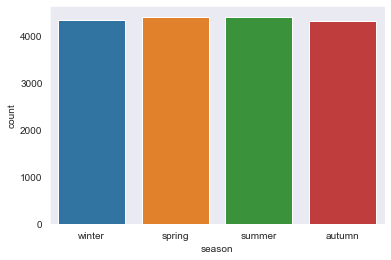

In [154]:
sns.countplot(x="season", data=bikes)

We can see that the measures have been done almost equally in all the seasons. That's a good news, it's better to analyze it with full data

In [155]:
bikes.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

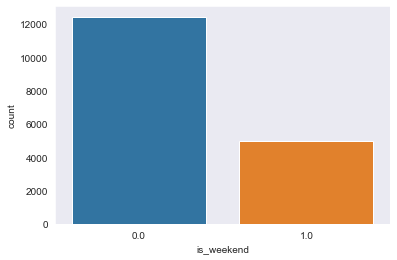

In [156]:
sns.countplot(x="is_weekend", data=bikes)

In [157]:
#Seeing the % of weekends compared to the whole week - so we can if the distribution is equal 
2/7

0.2857142857142857

In [158]:
4970/(12444+4970)

0.28540254967267714

Similar here, there's 29% of weekends in the week, we can see that we have almost perfect distribution for that. 

In [159]:
bikes.weather.value_counts()

Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Rain/Shower               2141
Cloudy                    1464
Snowfall                    60
Rain with thunderstorm      14
Name: weather, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Broken clouds'),
  Text(1, 0, 'Clear'),
  Text(2, 0, 'Cloudy'),
  Text(3, 0, 'Rain/Shower'),
  Text(4, 0, 'Scattered clouds'),
  Text(5, 0, 'Snowfall'),
  Text(6, 0, 'Rain with thunderstorm')])

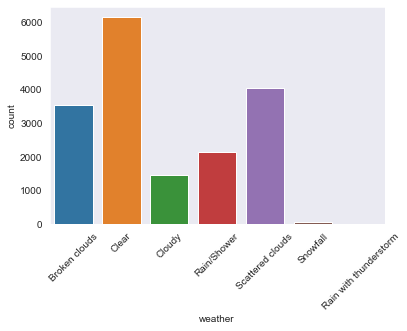

In [160]:
sns.countplot(x="weather", data=bikes)
plt.xticks(rotation=45)

No idea why Brits complain so much about weather, it seems really nice ;) 

<AxesSubplot:>

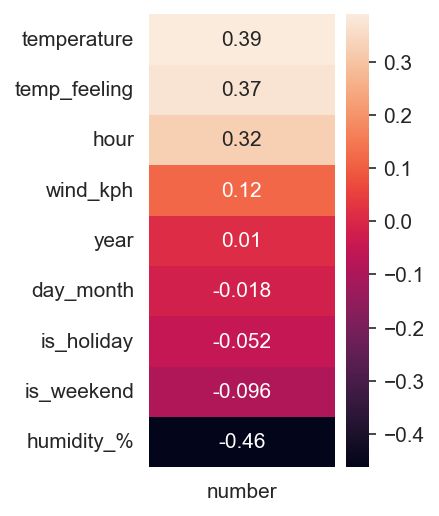

In [161]:
# Now, I'd like to see a correlation heatmap. I don't care about any other correlation but between 'number' and the rest so I'll just focus on that
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(bikes.corr()[["number"]].sort_values(by="number", ascending=False)[1:],annot=True)

We can see here that there's definitaly correlation between number of rentals and: humidity, temperature, feeling of the temperature and time, a bit less with wind

Now let's visualize some variables to learn a bit more about the data. 
Starting with how in general the numbers have changed in time

<AxesSubplot:xlabel='time', ylabel='number'>

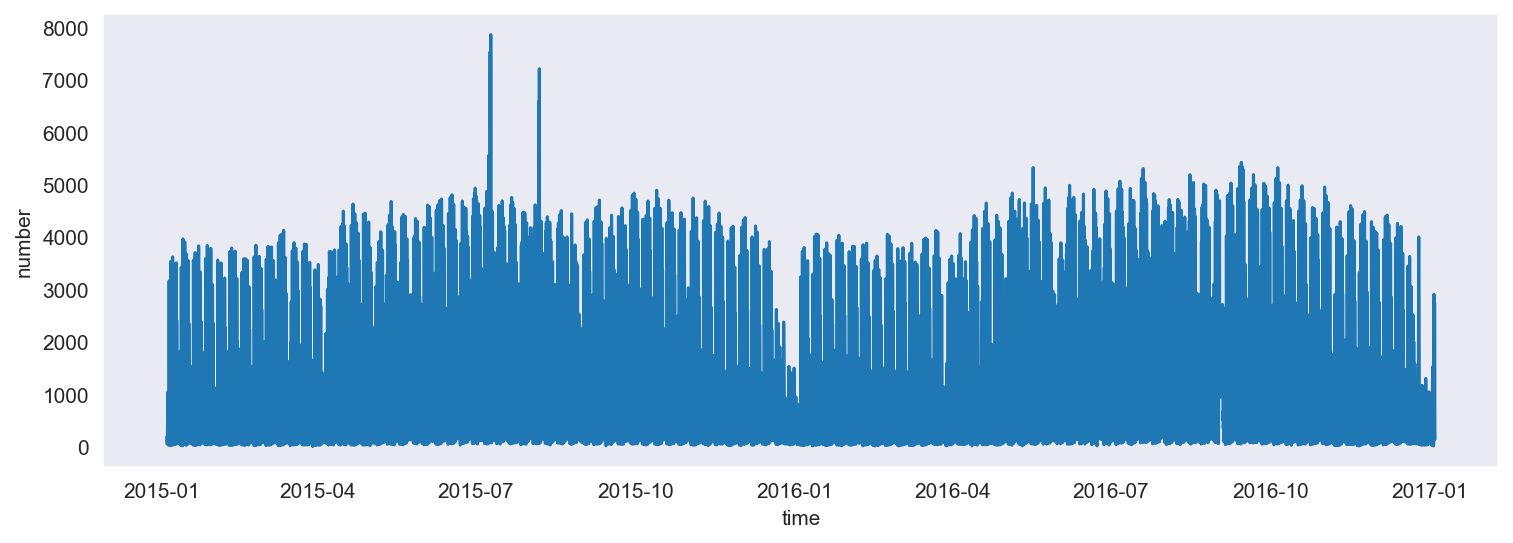

In [162]:
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(x="time", y="number", data=bikes)

There's an interesting moment when suddenly there's almost twice as many rentals as usually. Let's investigate.

In [163]:
high_numbers = bikes[bikes['number']>6000]
high_numbers

,number,temperature,temp_feeling,humidity_%,wind_kph,weather,is_holiday,is_weekend,season,year_month,year,month,day_month,day_week,hour
time,,,,,,,,,,,,,,,
2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,Scattered clouds,0.0,0.0,summer,2015-07,2015,July,9,Thursday,8
2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,Clear,0.0,0.0,summer,2015-07,2015,July,9,Thursday,16
2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,Clear,0.0,0.0,summer,2015-07,2015,July,9,Thursday,17
2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,Clear,0.0,0.0,summer,2015-07,2015,July,9,Thursday,18
2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,Rain/Shower,0.0,0.0,summer,2015-08,2015,August,6,Thursday,8
2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,Scattered clouds,0.0,0.0,summer,2015-08,2015,August,6,Thursday,17
2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,Scattered clouds,0.0,0.0,summer,2015-08,2015,August,6,Thursday,18


<AxesSubplot:>

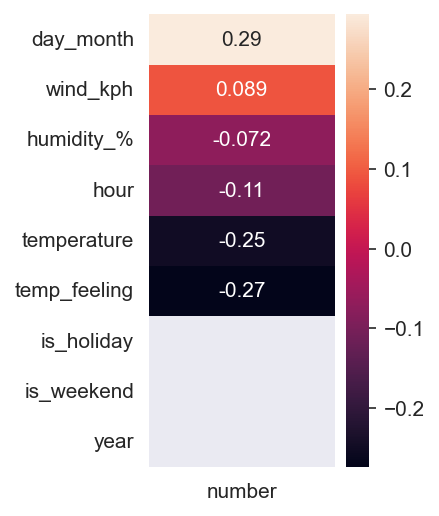

In [164]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(high_numbers.corr()[["number"]].sort_values(by="number", ascending=False)[1:],annot=True)

So we have 7 logs with such a peak. Interesting enough, there's no obvious reason for that when comparing the results with the correlation table but there are some a bit weird correlations. Interesting enough, there are two days with high rentals, they weren't any public holidays, they weren't on the weekend. The weather was mostly fine these days, temperature too so maybe it was just especially nice day for biking. Also we can see that the top hours are rush hours - so maybe this was also contributing factor.

<AxesSubplot:xlabel='year', ylabel='number'>

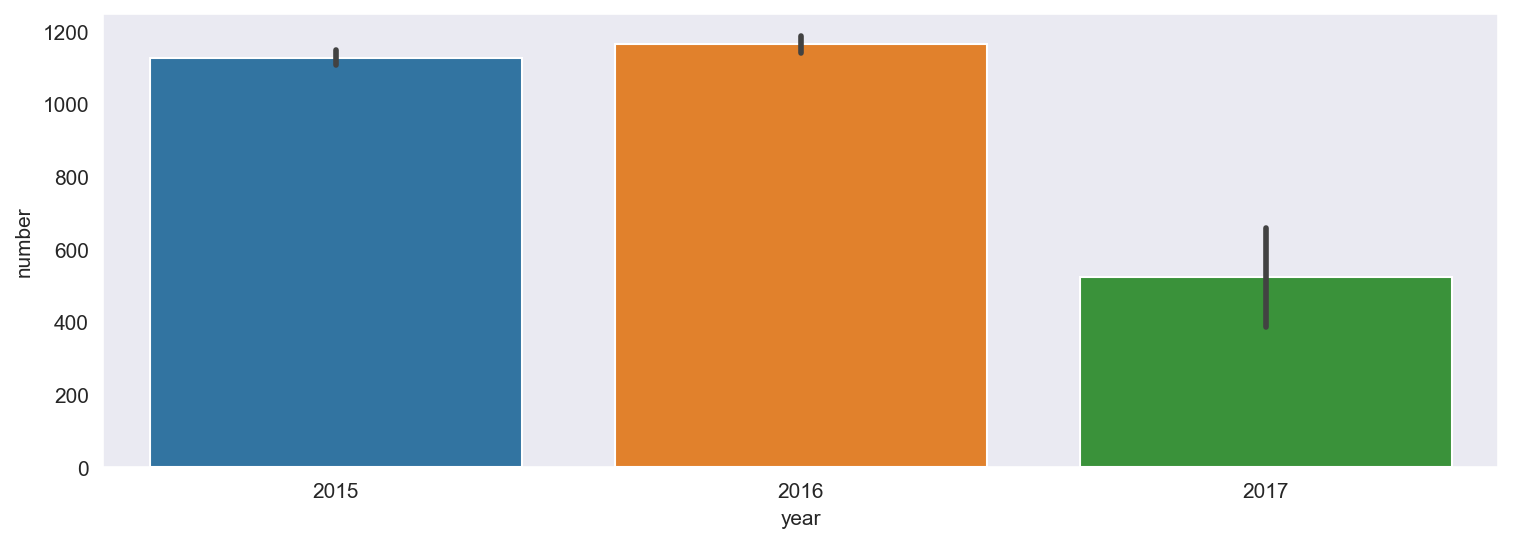

In [165]:
#Let's look at the years to see if there's anything interesting here. 
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x="year", y="number", data=bikes)

There's ovbiously much less rentals in 2017 because the data ends at the beginning of the year. But there's a slight increase in numbers between 2015 and 2016. Maybe if we had more data we could see a tendency? 

In [166]:
year_month = bikes.groupby('year_month').sum().reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

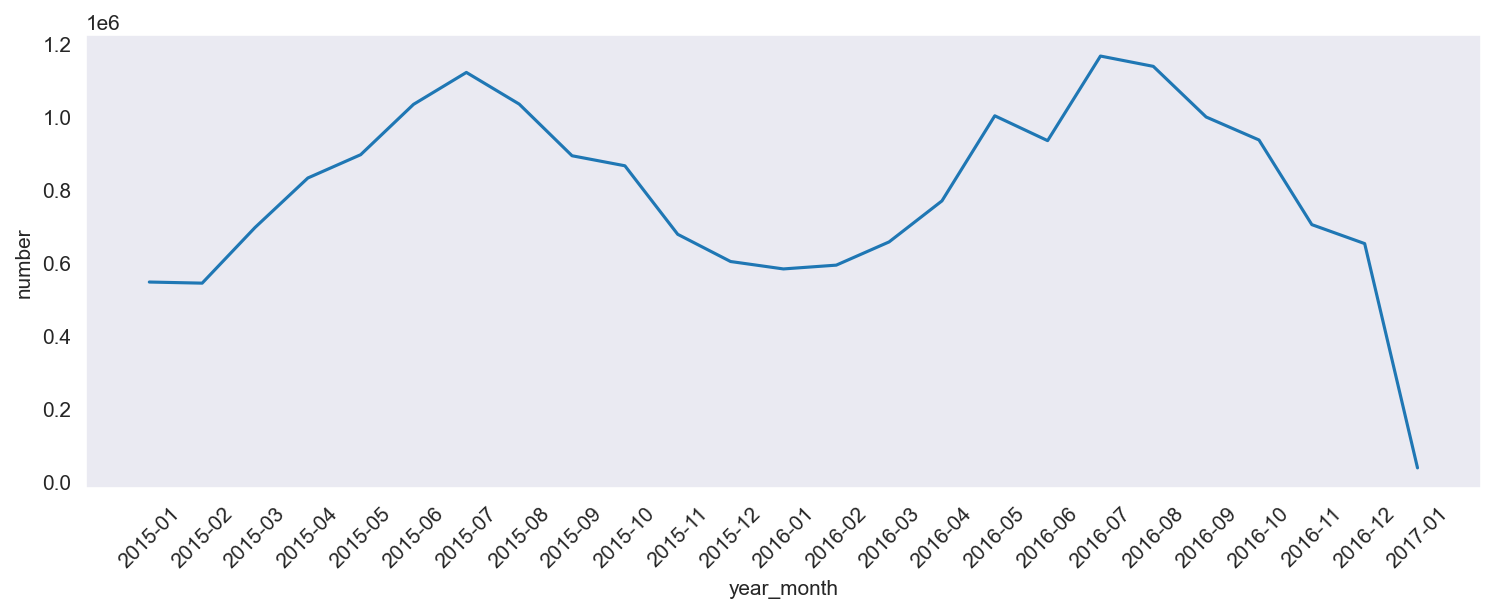

In [167]:
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(x='year_month', y='number', data=year_month)
plt.xticks(rotation=45)


<AxesSubplot:xlabel='month', ylabel='number'>

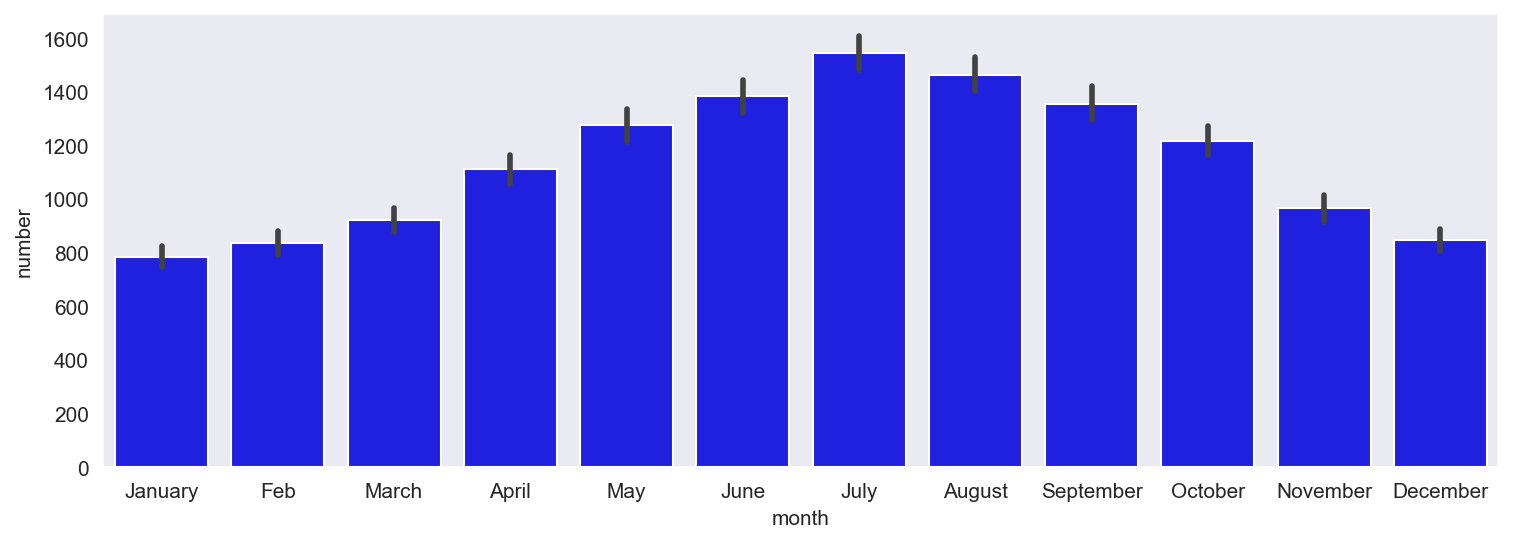

In [168]:
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x="month", y="number", data=bikes, color='blue')

On this chart we can easier see what was already visible on the previous one - july, august, june are definitely top months for bike rental. 

Since I've noticed that it doesn't make sense to keep the seasonal info as a number I'll change it to the season names for easier analysis



<AxesSubplot:xlabel='season', ylabel='number'>

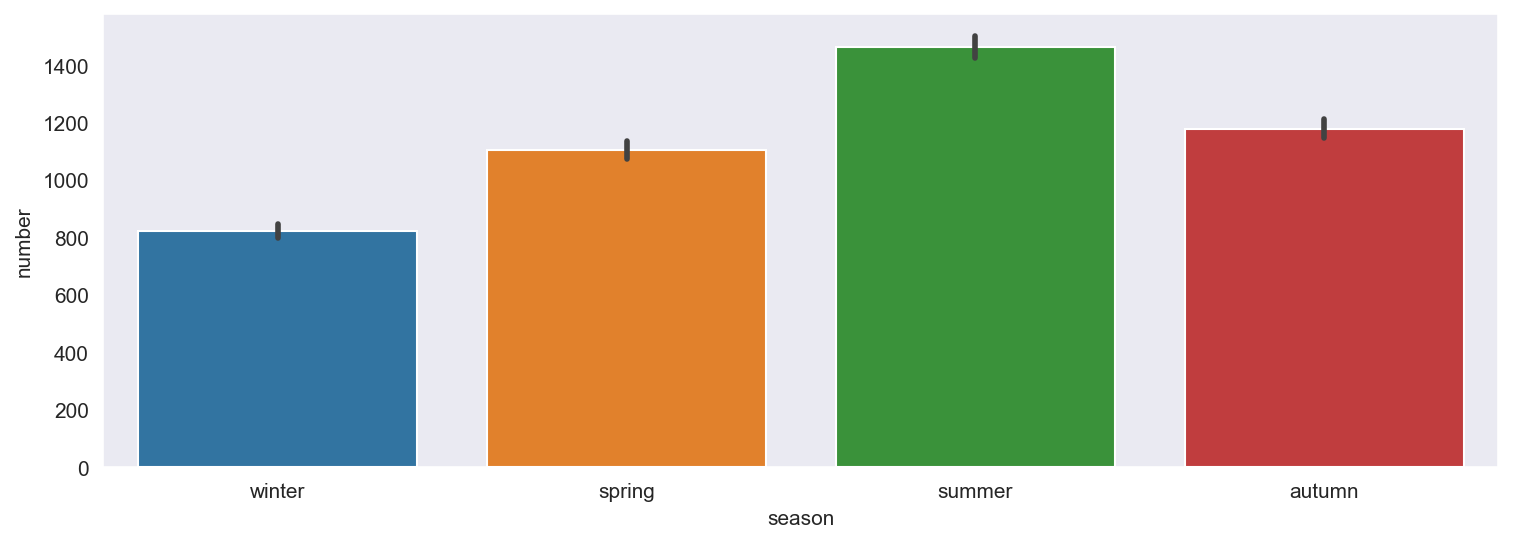

In [169]:
plt.figure(figsize=(12,4), dpi = 150)
sns.barplot(x='season', y="number", data=bikes)

Definitely we can see that seasonal data agrees with monthly - summer is the most popular season for bike rental. 

In the table with "peaks" analysis we could've seen that there were many rentals in rush hours. Let's see if it's something that is true for all the data

<AxesSubplot:xlabel='hour', ylabel='number'>

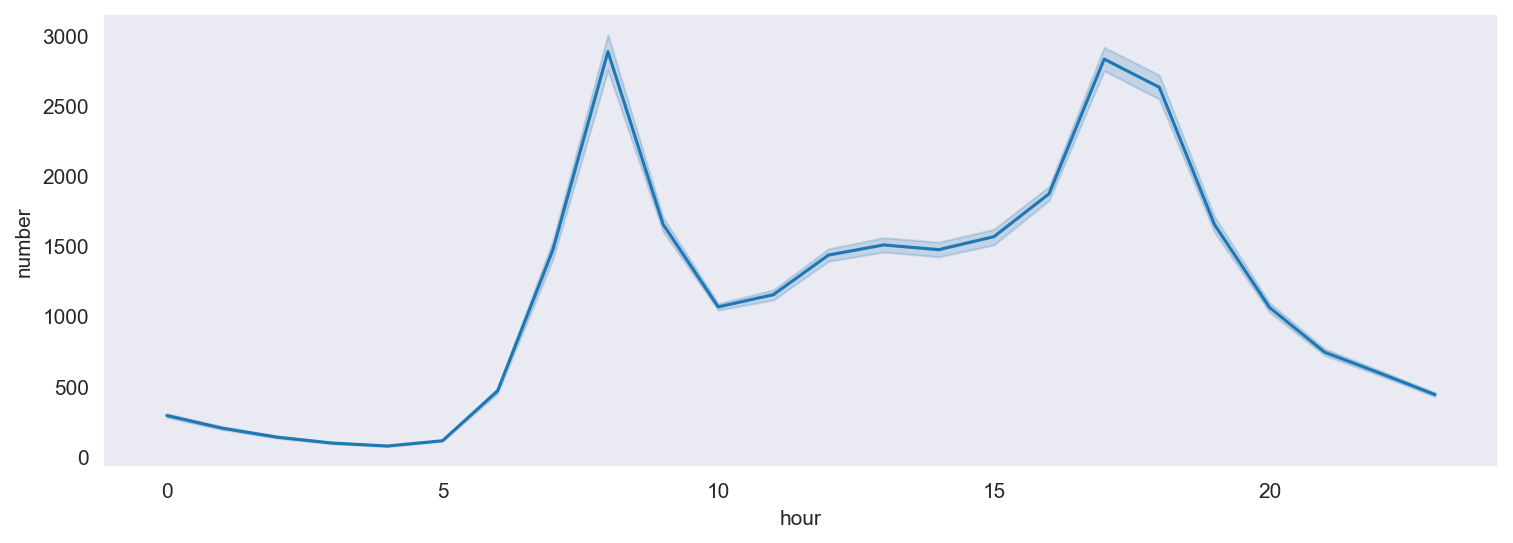

In [170]:
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(x="hour", y='number', data=bikes)

<AxesSubplot:xlabel='is_holiday', ylabel='number'>

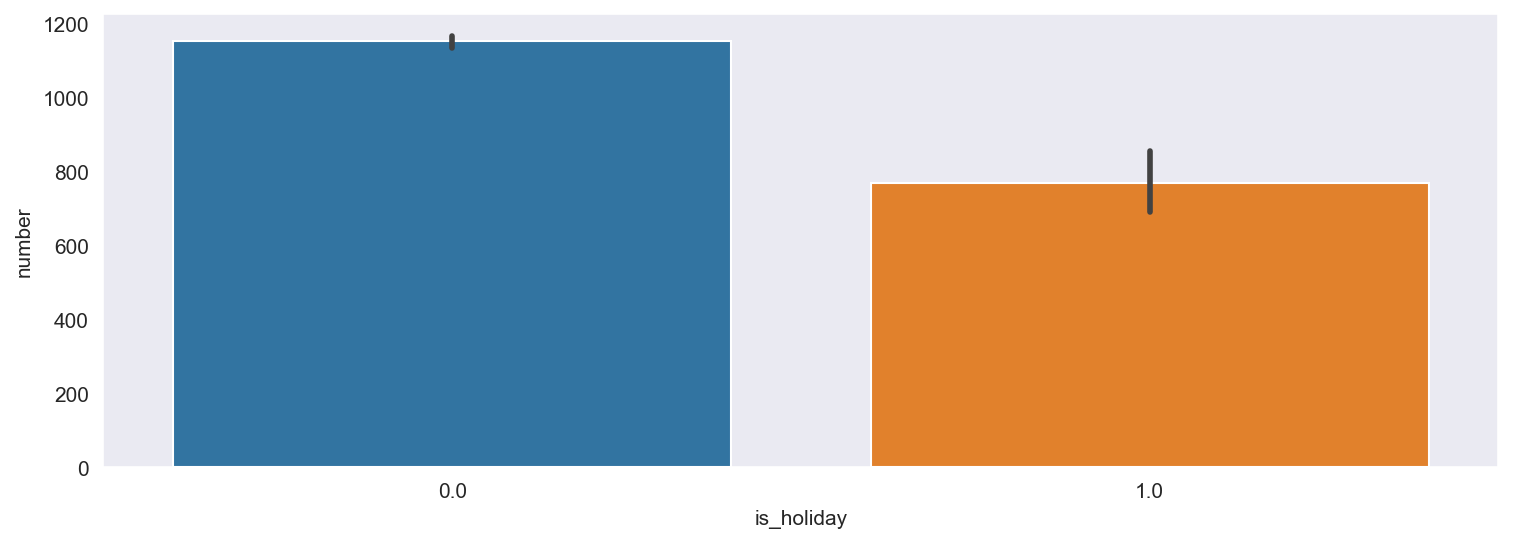

In [171]:
#Let's see if it's true also for holidays. First just how holiday/non-holiday rentals look like, next in hours distribution. 
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x="is_holiday", y="number", data=bikes)

<AxesSubplot:xlabel='hour', ylabel='number'>

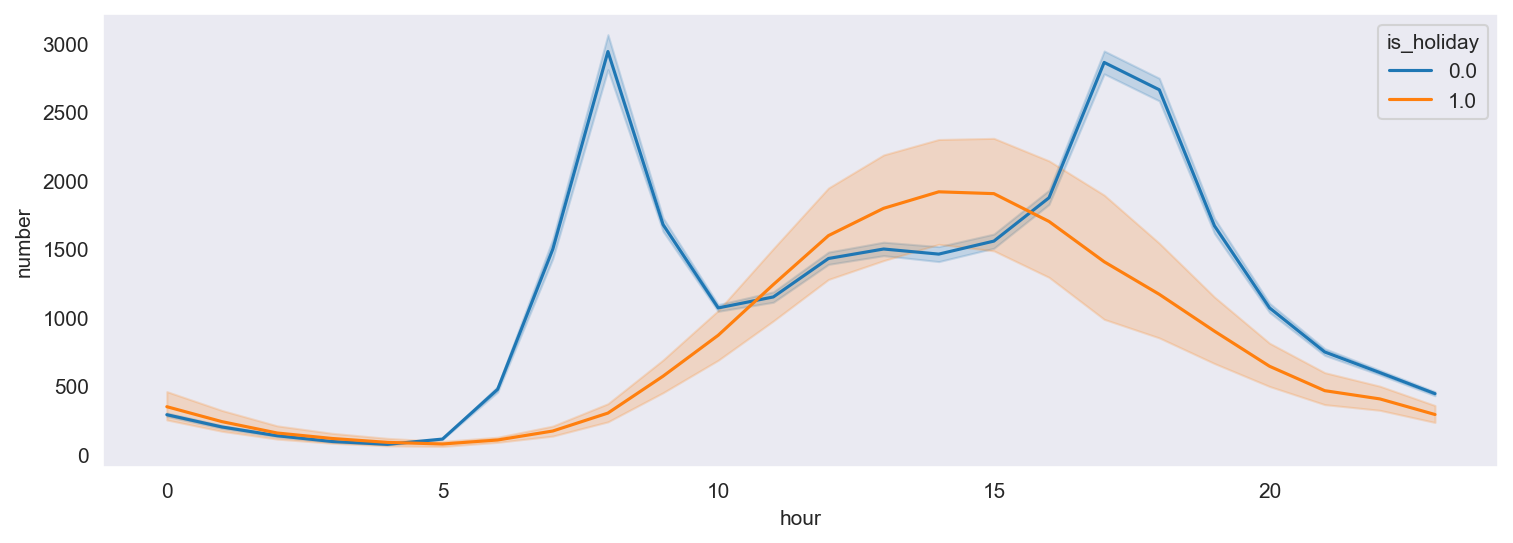

In [172]:
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(x="hour", y='number', hue="is_holiday", data=bikes)

That's really cool to see the rush hours - somewhere around 7-8 AM and then around 6 PM when people commute to and from work. It's clearly visible that it's not happening on the holidays where most rentals is slowly increasing from the morning, peaking in the afternoon and then slowly decreasing in the evening.

Now let's see if this also varies depending on the season

<AxesSubplot:xlabel='hour', ylabel='number'>

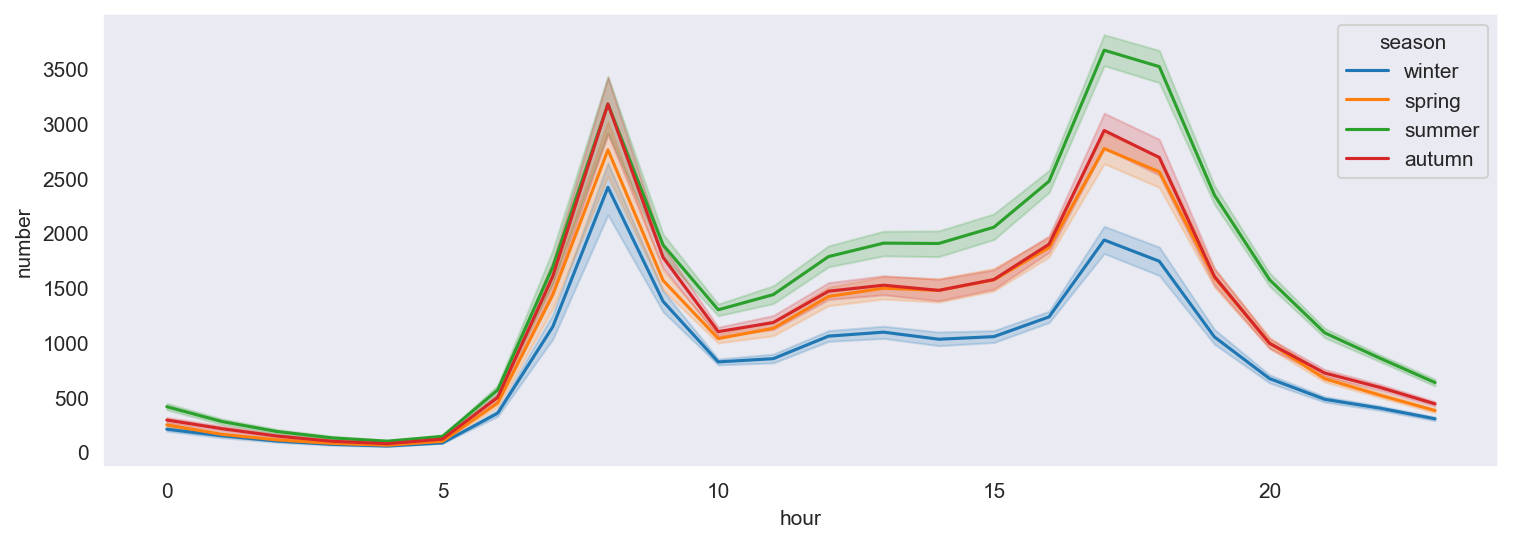

In [173]:
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(x="hour", y='number', hue="season", data=bikes)

Contrary to holidays the season doesn't affect rush hours - we can see that all the four lines are quite paralel to each other. Now let's check similar thing but if the day of the week were affecting the result. 

<AxesSubplot:xlabel='day_week', ylabel='number'>

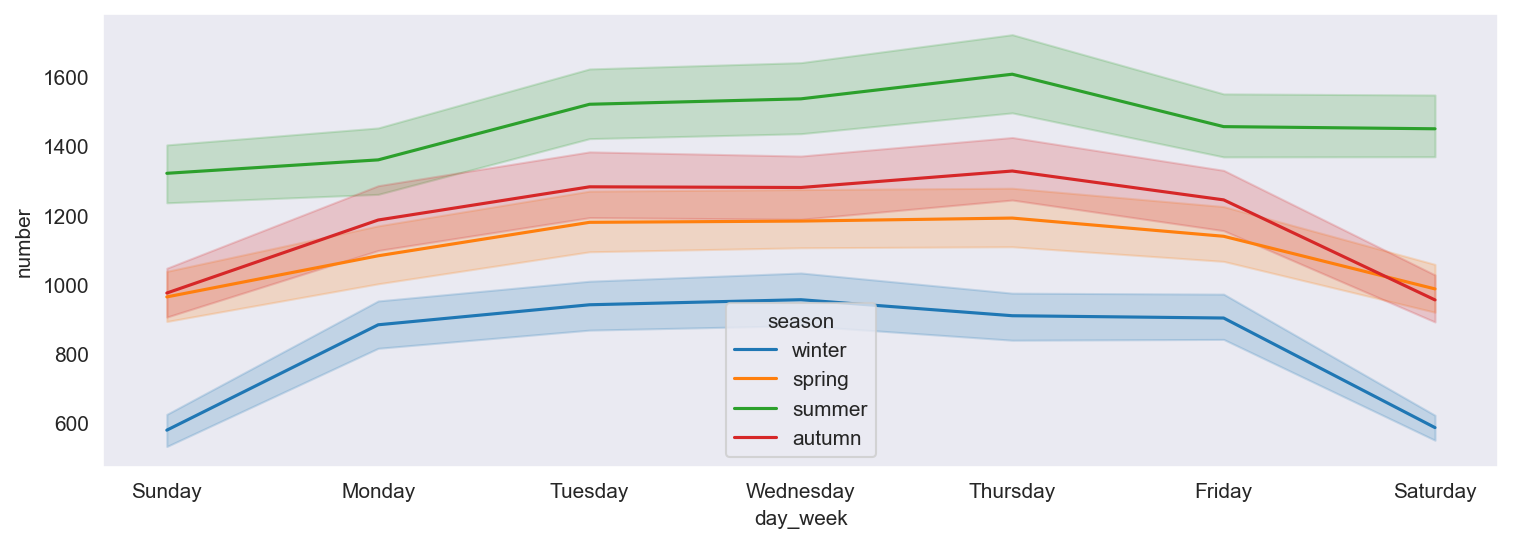

In [174]:
plt.figure(figsize=(12,4), dpi=150)
sns.lineplot(x="day_week", y='number', hue="season", data=bikes)

<AxesSubplot:xlabel='day_week', ylabel='number'>

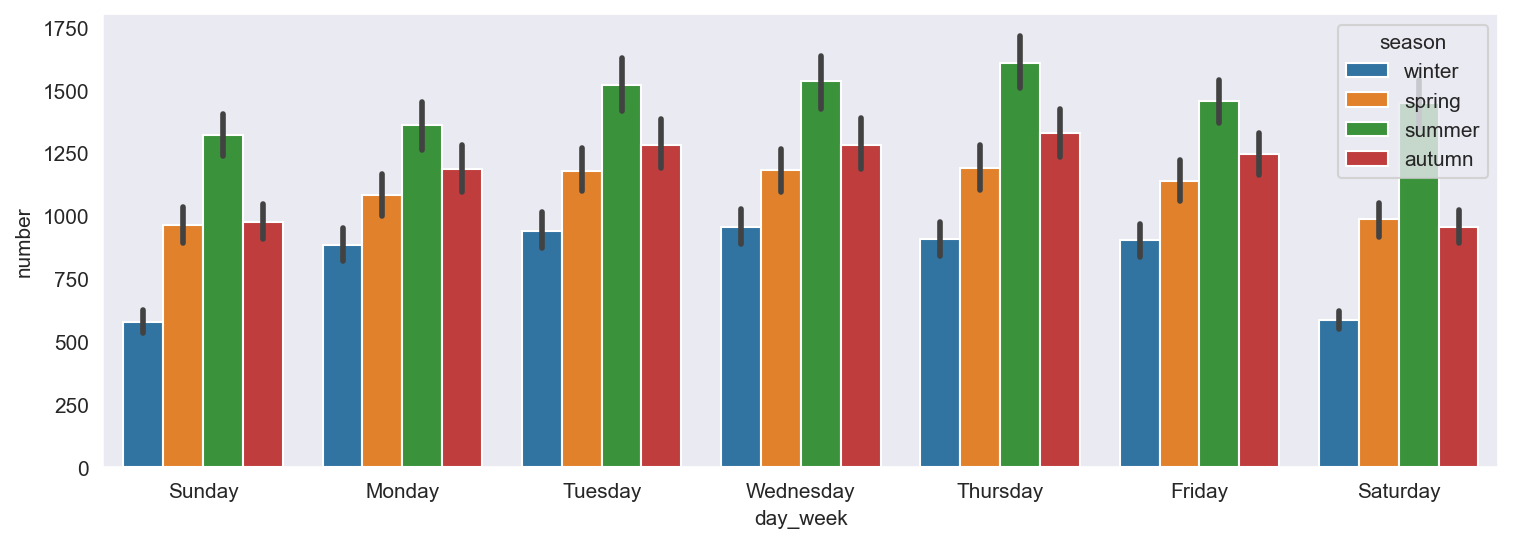

In [175]:
plt.figure(figsize=(12,4), dpi=150)
sns.barplot(x="day_week", y='number', hue="season", data=bikes)

The most interesting thing here to see is that on the summer weekends the rentals are almost as high as on weekdays, while in the other seasons they decrease.

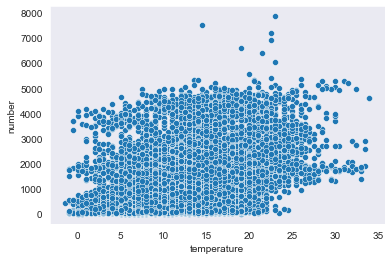

In [176]:
#Now let's see relationships between variables and rental numbers

sns.scatterplot(x="temperature", y="number", data=bikes)
plt.show()

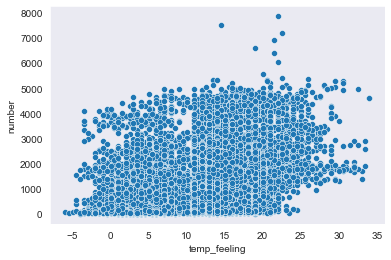

In [177]:
sns.scatterplot(x="temp_feeling", y="number", data=bikes)
plt.show()

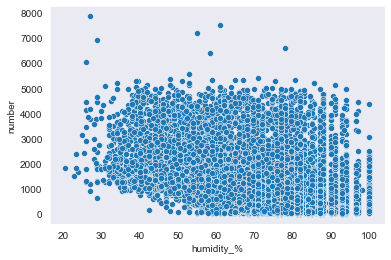

In [178]:
sns.scatterplot(x="humidity_%", y="number", data=bikes)
plt.show()

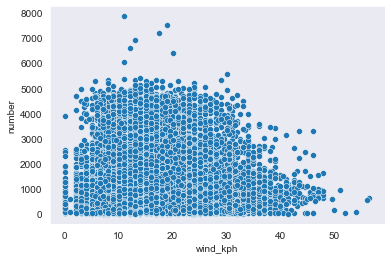

In [179]:
sns.scatterplot(x="wind_kph", y="number", data=bikes)
plt.show()

In all the scatterplots we can see a little bit of tendency towards one side or another but there's no obvious pattern. I'll try to dig deeper with some ML methods. 

## Linear regression

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        17414 non-null  int64  
 1   temperature   17414 non-null  float64
 2   temp_feeling  17414 non-null  float64
 3   humidity_%    17414 non-null  float64
 4   wind_kph      17414 non-null  float64
 5   weather       17414 non-null  object 
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  object 
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  object 
 12  day_month     17414 non-null  int64  
 13  day_week      17414 non-null  object 
 14  hour          17414 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 2.6+ MB


In [182]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [183]:
print(bikes_train.shape)
print(bikes_test.shape)

(12189, 15)
(5225, 15)


In [184]:
#Rescale the variables. It's not mandatory for regression but can be useful in the further analysis. I'm using normalization because I believe the features in the dataset are close to normal distribution

from sklearn.preprocessing import MinMaxScaler

In [185]:
scaler = MinMaxScaler()

variables = ['temperature', 'temp_feeling', 'humidity_%', 'number']

#fitting 

bikes_train[variables] = scaler.fit_transform(bikes_train[variables])
bikes_train.head()

c:\Users\Aleksandra\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,number,temperature,temp_feeling,humidity_%,wind_kph,weather,is_holiday,is_weekend,season,year_month,year,month,day_month,day_week,hour
time,,,,,,,,,,,,,,,
2016-01-15 06:00:00,0.063486,0.114286,0.100,0.673203,23.0,Scattered clouds,0.0,0.0,winter,2016-01,2016,January,15,Friday,6
2016-12-08 16:00:00,0.193766,0.428571,0.500,0.764706,17.0,Broken clouds,0.0,0.0,winter,2016-12,2016,December,8,Thursday,16
2016-06-14 00:00:00,0.030534,0.485714,0.550,0.843137,13.0,Rain/Shower,0.0,0.0,summer,2016-06,2016,June,14,Tuesday,0
2015-03-21 12:00:00,0.172392,0.257143,0.275,0.503268,19.0,Broken clouds,0.0,1.0,spring,2015-03,2015,March,21,Saturday,12
2016-02-23 23:00:00,0.041221,0.114286,0.225,0.830065,0.0,Clear,0.0,0.0,winter,2016-02,2016,Feb,23,Tuesday,23


In [132]:
bikes_train.describe()

,number,temperature,temp_feeling,humidity_%,wind_kph,is_holiday,is_weekend,year,day_month,hour
count,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000
mean,0.145362,0.385279,0.438506,0.637696,15.898782,0.021331,0.287144,2015.504471,15.825334,11.502256
std,0.137803,0.159109,0.165332,0.186892,7.913002,0.144490,0.452448,0.507493,8.797344,6.905174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.000000
25%,0.032061,0.257143,0.300000,0.516340,10.000000,0.000000,0.000000,2015.000000,8.000000,5.000000
50%,0.107634,0.385714,0.462500,0.666667,15.000000,0.000000,0.000000,2016.000000,16.000000,12.000000
75%,0.213232,0.485714,0.550000,0.777778,20.500000,0.000000,1.000000,2016.000000,23.000000,17.000000
max,1.000000,1.000000,1.000000,1.000000,56.500000,1.000000,1.000000,2017.000000,31.000000,23.000000


Now all the variables (numberic) are between zero and one which will make further analysis easier

<AxesSubplot:>

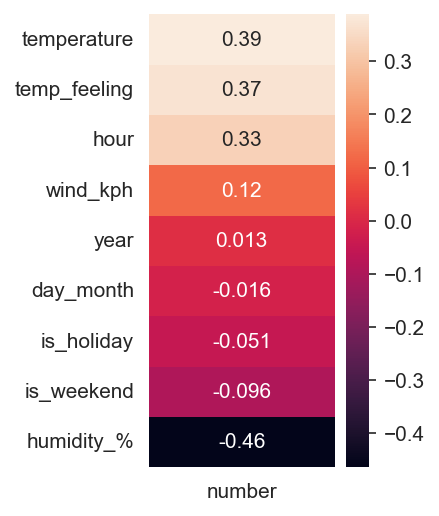

In [133]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(bikes_train.corr()[["number"]].sort_values(by="number", ascending=False)[1:],annot=True)